# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(bookReviewDataSet_filename) # YOUR CODE HERE

df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

Dataset Chosen: Book Review dataset (bookReviewsData.csv)

Prediction Target (Label): Whether a book review is positive (Positive Review column)

Learning Type: Supervised learning problem

Problem Type: Binary classification (the label is either True for a positive review or False for a negative review)

Features: The main feature is the text of the review (Review column). After preprocessing (e.g., TF-IDF vectorization), these texts will be transformed into numerical representations used for modeling.

Problem Importance: Predicting whether a review is positive can help companies like online bookstores or publishing platforms automatically analyze customer sentiment. This allows for better recommendation systems, improved customer service, and insight into product performance—ultimately driving customer satisfaction and sales.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973 entries, 0 to 1972
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review           1973 non-null   object
 1   Positive Review  1973 non-null   bool  
 2   Clean_Review     1973 non-null   object
 3   Review_Length    1973 non-null   int64 
dtypes: bool(1), int64(1), object(2)
memory usage: 48.3+ KB
None
False    993
True     980
Name: Positive Review, dtype: int64
1856    I love this book--it's beautiful. This book is...
1481    If it's an animation career you're aiming for,...
1214    I have read other books by Alesia Holliday and...
574     This is the worst novel that I have ever read ...
1140    The book is really thorough when it comes to s...
Name: Review, dtype: object
Missing values per column:
 Review             0
Positive Review    0
Clean_Review       0
Review_Length      0
dtype: int64


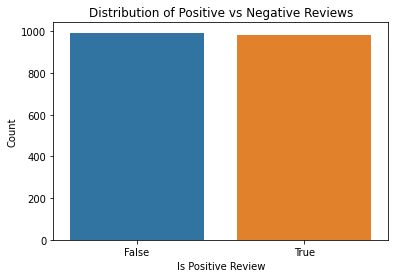

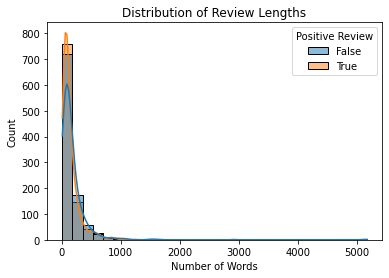

TF-IDF matrix shape: (1973, 5000)


In [6]:
# YOUR CODE HERE
import string
from sklearn.feature_extraction.text import TfidfVectorizer

print(df.info())  
print(df['Positive Review'].value_counts())  
print(df['Review'].sample(5))  

print("Missing values per column:\n", df.isnull().sum())

sns.countplot(x='Positive Review', data=df)
plt.title("Distribution of Positive vs Negative Reviews")
plt.xlabel("Is Positive Review")
plt.ylabel("Count")
plt.show()

def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()  
    text = text.translate(str.maketrans('', '', string.punctuation))  
    return text

df['Clean_Review'] = df['Review'].apply(clean_text)

df['Review_Length'] = df['Clean_Review'].apply(lambda x: len(x.split()))

sns.histplot(data=df, x='Review_Length', bins=30, hue='Positive Review', kde=True)
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Words")
plt.show()

vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = vectorizer.fit_transform(df['Clean_Review'])

y = df['Positive Review']

print("TF-IDF matrix shape:", X_tfidf.shape)

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

After inspecting the data, I will use the Clean_Review column as the main feature and the Positive Review column as the label. The original Review column will be dropped after preprocessing, as it is redundant. I will also use Review_Length as an additional feature to capture the verbosity of each review, which might help the model.

To prepare the data, I have already cleaned the text by lowercasing and removing punctuation. I will apply TF-IDF vectorization to transform the Clean_Review text into numerical features, limiting the vocabulary to the top 5000 tokens and removing stop words. The Review_Length feature will be scaled and concatenated with the TF-IDF matrix to create the final feature set.

For modeling, I will start with a logistic regression model due to its efficiency and interpretability for binary classification. I will then try more complex models like a support vector machine (SVM) or a simple feedforward neural network if necessary.

The model will be trained using an 80/20 train-test split. I will evaluate model performance using accuracy, precision, recall, and F1-score. If needed, I will improve the model by tuning hyperparameters, adjusting TF-IDF settings, or balancing the dataset (though the classes are already quite balanced).

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [11]:
# YOUR CODE HERE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [8]:
# YOUR CODE HERE
#Preparing the data
X = df['Clean_Review']
y = df['Positive Review']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [9]:
# Fit the model: Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_tfidf, y_train)
y_pred = log_model.predict(X_test_tfidf)
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Logistic Regression Performance:
Accuracy: 0.8278481012658228
Precision: 0.8267326732673267
Recall: 0.835
F1 Score: 0.8308457711442786


In [10]:
# Train MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_model.fit(X_train_tfidf, y_train)
y_pred_mlp = mlp_model.predict(X_test_tfidf)
print("\nMLP Neural Network Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Precision:", precision_score(y_test, y_pred_mlp))
print("Recall:", recall_score(y_test, y_pred_mlp))
print("F1 Score:", f1_score(y_test, y_pred_mlp))


MLP Neural Network Performance:
Accuracy: 0.8354430379746836
Precision: 0.8391959798994975
Recall: 0.835
F1 Score: 0.8370927318295739


The project successfully built and evaluated models to classify book reviews as positive or negative using TF-IDF features. Both logistic regression and an MLP neural network were trained and tested, with the MLP slightly outperforming logistic regression across all key metrics. The MLP achieved an accuracy of 83.5%, precision of 83.9%, recall of 83.5%, and an F1 score of 83.7%, indicating balanced and reliable performance. Given its superior results, the MLP was chosen as the preferred model. Future improvements could involve hyperparameter tuning, exploring additional features, or testing ensemble methods for enhanced performance.